In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ratings = pd.read_csv("drive/MyDrive/Dataset2/General Result/ratings.csv")
movies = pd.read_csv("drive/MyDrive/Dataset2/General Result/movies.csv")

In [4]:
movies_ratings = pd.merge(ratings, movies, on="movieId")

In [5]:
movies_ratings.head()

userId  movieId  rating   timestamp             title  \
0       1        1     4.0   964982703  Toy Story (1995)   
1       5        1     4.0   847434962  Toy Story (1995)   
2       7        1     4.5  1106635946  Toy Story (1995)   
3      15        1     2.5  1510577970  Toy Story (1995)   
4      17        1     4.5  1305696483  Toy Story (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1  Adventure|Animation|Children|Comedy|Fantasy  
2  Adventure|Animation|Children|Comedy|Fantasy  
3  Adventure|Animation|Children|Comedy|Fantasy  
4  Adventure|Animation|Children|Comedy|Fantasy

In [6]:
movies_ratings = movies_ratings[['userId', 'movieId', 'genres', 'rating']]

In [7]:
movies_ratings.head()

userId  movieId                                       genres  rating
0       1        1  Adventure|Animation|Children|Comedy|Fantasy     4.0
1       5        1  Adventure|Animation|Children|Comedy|Fantasy     4.0
2       7        1  Adventure|Animation|Children|Comedy|Fantasy     4.5
3      15        1  Adventure|Animation|Children|Comedy|Fantasy     2.5
4      17        1  Adventure|Animation|Children|Comedy|Fantasy     4.5

In [8]:
movies_ratings = movies_ratings.sort_values(by='userId', ascending=True)

In [9]:
movies_ratings.head()

userId  movieId                              genres  rating
2266        1      333                              Comedy     5.0
14949       1     3052            Adventure|Comedy|Fantasy     5.0
11293       1     2115            Action|Adventure|Fantasy     5.0
5548        1      919  Adventure|Children|Fantasy|Musical     5.0
9986        1     1620        Crime|Drama|Mystery|Thriller     4.0

In [10]:
movies_ratings['genres'] = movies_ratings['genres'].str.split('|')
movies_ratings.head()

userId  movieId                                   genres  rating
2266        1      333                                 [Comedy]     5.0
14949       1     3052             [Adventure, Comedy, Fantasy]     5.0
11293       1     2115             [Action, Adventure, Fantasy]     5.0
5548        1      919  [Adventure, Children, Fantasy, Musical]     5.0
9986        1     1620        [Crime, Drama, Mystery, Thriller]     4.0

In [11]:
n_movies = movies_ratings['movieId'].nunique()
n_users = movies_ratings['userId'].nunique()

print(f"Number of unique movieId's: {n_movies}")
print(f"Number of unique users: {n_users}")

Number of unique movieId's: 9724
Number of unique users: 610


In [12]:
movie_stats = ratings.groupby('userId')['movieId'].agg(['count'])
movie_stats.head()

count
userId       
1         232
2          29
3          39
4         216
5          44

In [13]:
# قم بتحويل البيانات إلى قاموس
user_movie_dict = {}

for user_id, count_for_user in movie_stats.iterrows():
    user_movie_dict[user_id] = count_for_user['count']

# طباعة النتائج لجميع المستخدمين
for user_id, count_for_user in user_movie_dict.items():
    print(f"The count for user {user_id} is: {count_for_user}")

The count for user 1 is: 232
The count for user 2 is: 29
The count for user 3 is: 39
The count for user 4 is: 216
The count for user 5 is: 44
The count for user 6 is: 314
The count for user 7 is: 152
The count for user 8 is: 47
The count for user 9 is: 46
The count for user 10 is: 140
The count for user 11 is: 64
The count for user 12 is: 32
The count for user 13 is: 31
The count for user 14 is: 48
The count for user 15 is: 135
The count for user 16 is: 98
The count for user 17 is: 105
The count for user 18 is: 502
The count for user 19 is: 703
The count for user 20 is: 242
The count for user 21 is: 443
The count for user 22 is: 119
The count for user 23 is: 121
The count for user 24 is: 110
The count for user 25 is: 26
The count for user 26 is: 21
The count for user 27 is: 135
The count for user 28 is: 570
The count for user 29 is: 81
The count for user 30 is: 34
The count for user 31 is: 50
The count for user 32 is: 102
The count for user 33 is: 156
The count for user 34 is: 86
The c

In [14]:
# تفجير القائمة في عمود 'genres'
exploded_ratings = movies_ratings.explode('genres')

# استخدام groupby لتجميع البيانات بناءً على 'userId' و 'genres'، ثم حساب حجم كل مجموعة
user_genre_counts = exploded_ratings.groupby(['userId', 'genres']).size().reset_index(name='No.Of Frequency')

# طباعة النتائج
user_genre_counts.head()


userId     genres  No.Of Frequency
0       1     Action               90
1       1  Adventure               85
2       1  Animation               29
3       1   Children               42
4       1     Comedy               83

In [ ]:
from collections import Counter

genre_frequency = Counter(g for genres in movies_ratings['genres'] for g in genres)

print(f"There are {len(genre_frequency)} genres.")

genre_frequency

There are 20 genres.


Counter({'Adventure': 24161,
         'Animation': 6988,
         'Children': 9208,
         'Comedy': 39053,
         'Fantasy': 11834,
         'Crime': 16681,
         'Horror': 7291,
         'Thriller': 26452,
         'Drama': 41928,
         'Action': 30635,
         'Romance': 18124,
         'Mystery': 7674,
         'War': 4859,
         'Sci-Fi': 17243,
         'Western': 1930,
         'Musical': 4138,
         'Film-Noir': 870,
         'Documentary': 1219,
         'IMAX': 4145,
         '(no genres listed)': 47})

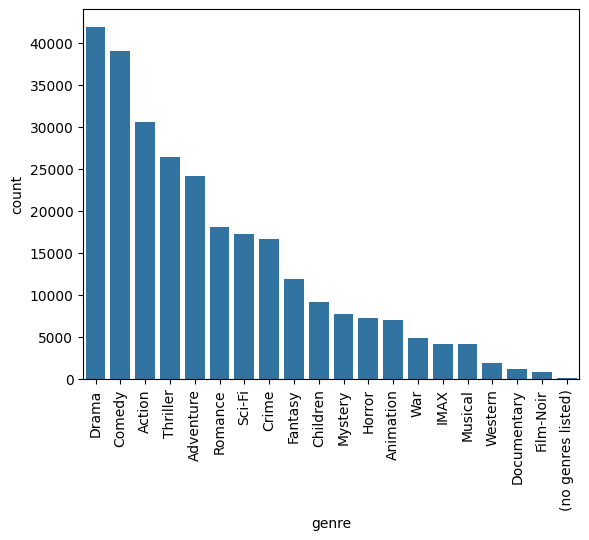

In [ ]:
genre_frequency_df = pd.DataFrame([genre_frequency]).T.reset_index()
genre_frequency_df.columns = ['genre', 'count']

sns.barplot(x='genre', y='count', data=genre_frequency_df.sort_values(by='count', ascending=False))
plt.xticks(rotation=90)
plt.show()

In [ ]:
# قم بتكوين القاموس لتخزين النتائج
user_genre_dict = {}

# قم بالتكرار على كل الـ genres الممكنة وكل المستخدمين
for user_id, genre, number_of_times in user_genre_counts.itertuples(index=False):
    # استخدم الزوج (user_id, genre) كمفتاح للقاموس و `No.Of Frequency` كقيمة.
    user_genre_dict[(user_id, genre)] = number_of_times

# طباعة النتائج في القاموس
for (user_id, genre), number_of_times in user_genre_dict.items():
    print(f"The No.Of Frequency for user '{user_id}' and genre '{genre}' is: [{number_of_times}]")

Streaming output truncated to the last 5000 lines.
The No.Of Frequency for user '306' and genre 'Western' is: [2]
The No.Of Frequency for user '307' and genre 'Action' is: [159]
The No.Of Frequency for user '307' and genre 'Adventure' is: [153]
The No.Of Frequency for user '307' and genre 'Animation' is: [45]
The No.Of Frequency for user '307' and genre 'Children' is: [94]
The No.Of Frequency for user '307' and genre 'Comedy' is: [518]
The No.Of Frequency for user '307' and genre 'Crime' is: [140]
The No.Of Frequency for user '307' and genre 'Documentary' is: [5]
The No.Of Frequency for user '307' and genre 'Drama' is: [341]
The No.Of Frequency for user '307' and genre 'Fantasy' is: [107]
The No.Of Frequency for user '307' and genre 'Film-Noir' is: [5]
The No.Of Frequency for user '307' and genre 'Horror' is: [138]
The No.Of Frequency for user '307' and genre 'IMAX' is: [17]
The No.Of Frequency for user '307' and genre 'Musical' is: [48]
The No.Of Frequency for user '307' and genre 'My

In [ ]:
def user_behavior_probability(total_movies, genre_label_count):
    user_behavior_prob = genre_label_count / total_movies
    return round(user_behavior_prob, 3)


In [ ]:
# قم بتكوين القاموس لتخزين نتائج الاحتمالات لكل تصنيف (genre) لكل مستخدم
user_genre_probabilities = []

for user_id, genre, genre_count in user_genre_counts.itertuples(index=False):
    # احتمال تصنيف المستخدم للتصنيف (genre) الحالي
    probability = user_behavior_probability(user_movie_dict[user_id], genre_count)

    # استخدم الزوج (user_id, genre) كمفتاح للقاموس والاحتمال كقيمة
    user_genre_probabilities.append({'User_ID': user_id, 'Genre': genre, 'Probability': probability})

# تحويل النتائج إلى DataFrame
results_df = pd.DataFrame(user_genre_probabilities)

# استخدم pivot لتحويل البيانات إلى الشكل المطلوب
User_Behavior_Probability = results_df.pivot(index='User_ID', columns='Genre', values='Probability')

# استخدام fillna لتعويض القيم الفارغة بصفر (إذا لزم الأمر)
User_Behavior_Probability.fillna(0, inplace=True)

# ضبط إعدادات pandas لعرض جميع الصفوف والأعمدة
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

User_Behavior_Probability.head()

Genre    (no genres listed)  Action  Adventure  Animation  Children  Comedy  \
User_ID                                                                       
1                       0.0   0.388      0.366      0.125     0.181   0.358   
2                       0.0   0.379      0.103      0.000     0.000   0.241   
3                       0.0   0.359      0.282      0.103     0.128   0.231   
4                       0.0   0.116      0.134      0.028     0.046   0.481   
5                       0.0   0.205      0.182      0.136     0.205   0.341   

Genre    Crime  Documentary  Drama  Fantasy  Film-Noir  Horror   IMAX  \
User_ID                                                                 
1        0.194        0.000  0.293    0.203      0.004   0.073  0.000   
2        0.345        0.103  0.586    0.000      0.000   0.034  0.138   
3        0.051        0.000  0.410    0.103      0.000   0.205  0.000   
4        0.125        0.009  0.556    0.088      0.019   0.019  0.005   
5        0.273        0.000  0.568    0.159      0.000   0.023  0.068   

Genre    Musical  Mystery  Romance  Sci-Fi  Thriller    War  Western  
User_ID                                                               
1          0.095    0.078    0.112   0.172     0.237  0.095    0.030  
2          0.000    0.069    0.034   0.138     0.345  0.034    0.034  
3          0.026    0.026    0.128   0.385     0.179  0.128    0.000  
4          0.074    0.106    0.269   0.056     0.176  0.032    0.046  
5          0.114    0.023    0.250   0.045     0.205  0.068    0.045

In [ ]:

# قاموس لتخزين الاحتماليات لكل مستخدم وتصنيف
user_genre_probabilities_dict = {}

# iterate over each row (user) in the pivot_results DataFrame
for user_id, row in User_Behavior_Probability.iterrows():
    # iterate over each column (genre) in the row
    for genre_name, user_genre_probability in row.items():
        # تخزين الاحتمالية في القاموس
        user_genre_probabilities_dict[(user_id, genre_name)] = user_genre_probability

# إنشاء DataFrame لتخزين متوسط احتماليات كل مستخدم
user_mean_df = pd.DataFrame(index=User_Behavior_Probability.index, columns=['Mean_Probability'])

# حساب متوسط احتماليات كل مستخدم وتخزينه في DataFrame
for user_id in User_Behavior_Probability.index:
    user_probabilities = [user_genre_probabilities_dict[(user_id, genre_name)] for genre_name in User_Behavior_Probability.columns]
    mean_probability = np.mean(user_probabilities)

    # تخزين النتيجة في DataFrame
    user_mean_df.loc[user_id] = [mean_probability]

# طباعة DataFrame النتائج
user_mean_df.head()

Mean_Probability
User_ID                 
1                 0.1502
2                0.12915
3                 0.1372
4                0.11925
5                 0.1455

In [ ]:
# 1

# قاموس لتخزين الاحتماليات لكل مستخدم وتصنيف
user_genre_probabilities_dict = {}

# iterate over each row (user) in the pivot_results DataFrame
for user_id, row in User_Behavior_Probability.iterrows():
    # iterate over each column (genre) in the row
    for genre_name, user_genre_probability in row.items():
        # تخزين الاحتمالية في القاموس
        user_genre_probabilities_dict[(user_id, genre_name)] = user_genre_probability

# إنشاء DataFrame لتخزين متوسط احتماليات كل مستخدم
PCC_Probability = pd.DataFrame(index=User_Behavior_Probability.index, columns=User_Behavior_Probability.index)

# حساب متوسط احتماليات كل مستخدم وتخزينه في DataFrame
for user_id1 in User_Behavior_Probability.index:
    for user_id2 in User_Behavior_Probability.index:
        # استخدام معادلة معامل بيرسون لحساب الشبه بين المستخدمين
        user1_probabilities = [user_genre_probabilities_dict[(user_id1, genre_name)] for genre_name in User_Behavior_Probability.columns]
        user2_probabilities = [user_genre_probabilities_dict[(user_id2, genre_name)] for genre_name in User_Behavior_Probability.columns]

        U1_mean = np.mean(user1_probabilities)
        U2_mean = np.mean(user2_probabilities)

        numerator = np.sum((np.array(user1_probabilities) - U1_mean) * (np.array(user2_probabilities) - U2_mean))
        denominator_U1 = np.sqrt(np.sum((np.array(user1_probabilities) - U1_mean)**2))
        denominator_U2 = np.sqrt(np.sum((np.array(user2_probabilities) - U2_mean)**2))

        PCC_UV = numerator / (denominator_U1 * denominator_U2)

        # تخزين النتيجة في DataFrame
        PCC_Probability.loc[user_id1, user_id2] = PCC_UV

# طباعة DataFrame النتائج
PCC_Probability.head()

User_ID       1         2         3         4         5         6         7    \
User_ID                                                                         
1             1.0  0.613272  0.781623  0.622256  0.714236  0.765052  0.928886   
2        0.613272       1.0  0.602479  0.678677   0.74276  0.722573    0.7318   
3        0.781623  0.602479       1.0  0.548974  0.576042   0.67552  0.858254   
4        0.622256  0.678677  0.548974       1.0  0.886136   0.95086  0.676309   
5        0.714236   0.74276  0.576042  0.886136       1.0  0.918052  0.719703   

User_ID       8         9         10        11        12        13        14   \
User_ID                                                                         
1        0.788476  0.759237  0.573083  0.755483  0.423484  0.747465  0.706833   
2        0.720335  0.828232  0.468372  0.777264  0.387369  0.831295  0.792944   
3        0.619945  0.788524  0.485117  0.685882  0.428108  0.801099  0.640299   
4        0.899533  0.886162  0.890054  0.471357  0.866847  0.833823  0.920907   
5        0.837845  0.826634  0.816846  0.546525  0.718909  0.765467  0.881366   

User_ID       15        16        17        18        19        20        21   \
User_ID                                                                         
1        0.817912  0.787312  0.836655  0.870749  0.800854  0.737547  0.919846   
2        0.661665  0.867804  0.860388  0.896011  0.479709  0.221662  0.581557   
3        0.889832  0.737006  0.756028  0.772189  0.646246  0.474726  0.726998   
4        0.446212  0.795426   0.62642  0.681841  0.741779  0.548769  0.524662   
5        0.543788  0.858898  0.765345  0.749334  0.630991  0.671603  0.569041   

User_ID       22        23        24        25        26        27        28   \
User_ID                                                                         
1        0.757102  0.609295  0.859799  0.769707  0.713637  0.855792  0.693957   
2        0.870684  0.896277  0.739941  0.616718  0.833597  0.351669  0.937698   
3        0.710504  0.597879  0.744877  0.814537  0.534514  0.747548  0.750398   
4        0.889792  0.765627  0.727309    0.3392  0.508022  0.561824  0.700537   
5        0.933529  0.811653  0.695561   0.48646  0.612477   0.65391  0.759322   

User_ID       29        30        31        32        33        34        35   \
User_ID                                                                         
1        0.653384  0.704827  0.863176  0.795542  0.500679  0.875739  0.664221   
2        0.844857  0.468218   0.48654   0.77828  0.720097  0.645258  0.595789   
3        0.760402  0.716499  0.722783  0.669888  0.533756  0.796919  0.504118   
4        0.620668  0.132874  0.773341  0.899566  0.951148  0.586133  0.914476   
5        0.683621  0.266642  0.743143  0.857954  0.905045  0.562997  0.862628   

User_ID       36        37        38        39        40        41        42   \
User_ID                                                                         
1        0.787025  0.881712  0.745192  0.895424  0.805313  0.672604   0.80066   
2         0.83242  0.799839  0.664304  0.606787  0.693871  0.812614  0.778046   
3         0.63604  0.691087  0.644911  0.754661   0.71364  0.627365  0.673027   
4        0.875761  0.667165  0.938651  0.596975  0.926879   0.95832  0.903715   
5        0.847819  0.746232  0.884566  0.762566  0.937051  0.924253  0.819053   

User_ID       43        44        45        46        47        48        49   \
User_ID                                                                         
1        0.900935  0.907835  0.870606  0.873338  0.440961  0.768088  0.651313   
2        0.600107  0.604125  0.594457  0.829766  0.763519  0.531548  0.681005   
3        0.717494  0.751447  0.702451  0.710706  0.547499  0.818488  0.867267   
4        0.782661  0.622741  0.820901  0.619102  0.888417  0.285213  0.503088   
5        0.861499  0.591349  0.751633   0.71782  0.859549  0.337728  0.592097   

User_ID       50        

In [ ]:
# البيانات الأصلية
df = pd.DataFrame(movies_ratings)

# قائمة بالمستخدمين الفريدة
users = df['userId'].unique()

# إعداد الجدول
common_data = []

# حلقة لبناء البيانات
for user1 in users:
    row_data = []
    for user2 in users:
        if user1 == user2:
            # عندما يكون المستخدم هو نفسه، يمكنك تعيين قيمة معينة (مثل 0) أو تركها فارغة
            row_data.append(None)
        else:
            pair = tuple(sorted([user1, user2]))
            common_movies = len(pd.merge(df[df['userId'] == user1]['movieId'], df[df['userId'] == user2]['movieId'], on='movieId'))
            row_data.append(common_movies)

    common_data.append(row_data)
# تحويل البيانات إلى DataFrame وتعديل القيم NaN إلى 0
common_m = pd.DataFrame(common_data, index=users, columns=users).fillna(1)
common_m.head()


1    2    3     4     5     6     7     8    9    10    11   12   13   \
1   1.0  2.0  7.0  45.0  13.0  33.0  26.0  15.0  5.0  6.0  16.0  2.0  6.0   
2   2.0  1.0  0.0   1.0   1.0   2.0   3.0   1.0  0.0  5.0   2.0  0.0  1.0   
3   7.0  0.0  1.0   1.0   1.0   3.0   0.0   1.0  0.0  0.0   0.0  0.0  0.0   
4  45.0  1.0  1.0   1.0  12.0  27.0  22.0   9.0  1.0  9.0   8.0  5.0  7.0   
5  13.0  1.0  1.0  12.0   1.0  36.0   9.0  19.0  0.0  3.0  10.0  3.0  1.0   

    14    15    16    17    18     19    20    21   22    23    24   25   \
1  13.0  25.0  26.0  38.0  70.0  123.0  33.0  47.0  7.0  17.0  25.0  7.0   
2   1.0  10.0   5.0   6.0  20.0    2.0   1.0  11.0  7.0   1.0   7.0  6.0   
3   1.0   3.0   3.0   4.0   6.0    5.0   5.0   3.0  2.0   1.0   1.0  1.0   
4   8.0  13.0  27.0  23.0  42.0   75.0  24.0  22.0  8.0  18.0  12.0  3.0   
5  13.0   8.0   5.0  10.0  18.0   17.0   7.0   8.0  2.0   5.0   7.0  1.0   

    26    27    28    29   30    31    32    33    34    35    36    37   \
1   7.0  46.0  73.0  20.0  8.0  17.0  22.0  27.0  15.0   6.0  10.0  11.0   
2   0.0   0.0   7.0   5.0  5.0   0.0   1.0   2.0   2.0   0.0   2.0   1.0   
3   0.0   1.0   9.0   2.0  0.0   1.0   2.0   3.0   1.0   0.0   0.0   0.0   
4   4.0  22.0  51.0   9.0  5.0  12.0  28.0  32.0  12.0   5.0  13.0   4.0   
5  10.0   7.0  18.0   5.0  3.0   3.0  15.0  21.0   4.0  11.0   1.0  11.0   

    38    39    40    41    42    43    44     45    46    47   48   49   \
1  19.0  51.0  16.0  27.0  79.0  22.0  13.0  100.0  11.0  13.0  9.0  7.0   
2   1.0   0.0   1.0  12.0   4.0   1.0   0.0    3.0   1.0   4.0  0.0  3.0   
3   1.0   2.0   1.0   1.0   8.0   0.0   1.0    5.0   0.0   2.0  0.0  1.0   
4  14.0  34.0  11.0  30.0  51.0  11.0   4.0   63.0   5.0  12.0  3.0  1.0   
5  23.0  10.0  23.0   7.0  19.0  26.0   2.0   22.0  20.0   4.0  0.0  3.0   

    50    51    52   53    54   55    56     57    58    59   60    61    62   \
1  25.0  40.0   8.0  4.0  12.0  6.0  14.0  112.0  26.0  38.0  4.0  12.0  29.0   
2  11.0   2.0   9.0  0.0   1.0  1.0   2.0    2.0   2.0   0.0  2.0   2.0  19.0   
3   5.0   8.0   0.0  0.0   0.0  1.0   0.0    7.0   2.0   3.0  1.0   1.0   2.0   
4  23.0  28.0  10.0  0.0   8.0  2.0   4.0   78.0  19.0  22.0  3.0   8.0  17.0   
5   5.0   8.0   4.0  0.0  14.0  0.0  16.0   29.0  32.0   5.0  3.0   3.0   6.0   

    63     64   65    66    67     68    69   70    71    72    73    74   \
1  52.0  111.0  5.0  66.0  11.0  154.0  15.0  9.0  10.0  20.0   9.0  13.0   
2  12.0    5.0  7.0   5.0   4.0   20.0   2.0  2.0   0.0   1.0  11.0   1.0   
3   2.0    8.0  1.0   6.0   0.0   14.0   0.0  3.0   1.0   2.0   1.0   2.0   
4  44.0   82.0  2.0  47.0   6.0   91.0  13.0  9.0   4.0  12.0   5.0  19.0   
5  18.0   25.0  2.0  13.0   3.0   32.0   4.0  4.0   3.0  10.0   2.0   4.0   

    75    76   77    78    79    80    81    82    83    84   85    86   87   \
1  20.0  29.0  6.0  20.0  26.0  13.0  10.0  47.0  19.0  44.0  1.0  19.0  2.0   
2   0.0   8.0  4.0   1.0   1.0  10.0   1.0   1.0   6.0   1.0  1.0   4.0  0.0   
3   1.0   0.0  0.0   0.0   0.0   1.0   0.0   1.0   0.0   9.0  1.0   0.0  0.0   
4  15.0  22.0  6.0  11.0  14.0   7.0   5.0  18.0  11.0  54.0  7.0  14.0  2.0   
5   3.0   6.0  0.0   9.0   2.0   3.0  14.0  14.0   4.0  26.0  2.0   6.0  1.0   

   88    89    90     91   92    93    94    95    96   97    98    99    100  \
1  8.0  17.0   6.0  117.0  2.0  37.0  13.0  32.0  38.0  7.0  10.0   7.0  29.0   
2  6.0   1.0   0.0    5.0  0.0   2.0   1.0   0.0   1.0  1.0   4.0   2.0   0.0   
3  2.0   2.0   0.0    3.0  0.0   4.0   0.0   2.0   2.0  0.0   1.0   0.0   1.0   
4  5.0  28.0  12.0   79.0  0.0  15.0   8.0  16.0  18.0  4.0   8.0   2.0  30.0   
5  3.0   3.0   4.0   32.0  0.0  14.0  23.0   4.0  10.0  0.0   3.0  12.0   9.0   

    101   102   103   104   105  106   107   108   109   110   111   112  \
1  15.0  17.0  59.0  33.0  35.0  2.0   7.0   7.0  26.0  14.0  33.0  18.0   
2   1.0   1.0  13.0   0.0  20.0  1.0   1.0   0.0   1.0   0.0  17.0   6.0   
3   1.0   0.0   5.0   7.

In [ ]:
# 2


# تعريف القانون
def custom_function(value):
    if 0 <= value <= 5:
        return np.exp(-(5 - value))
    elif value > 5:
        return np.log(value - 5) + 1
    else:
        return 0




In [ ]:
# استبدل custom_function بالدالة التي تريدها
def convert_zero_to_one(value):
    return 1 if value == 0 else value
# تطبيق الدالة المخصصة على القيم في الجدول
CONFIDENCE_COEFFICIENT = pd.DataFrame(common_data, index=users, columns=users).applymap(custom_function).applymap(convert_zero_to_one)
CONFIDENCE_COEFFICIENT.head()

1         2         3         4         5         6         7    \
1  1.000000  0.049787  1.693147  4.688879  3.079442  4.332205  4.044522   
2  0.049787  1.000000  0.006738  0.018316  0.018316  0.049787  0.135335   
3  1.693147  0.006738  1.000000  0.018316  0.018316  0.135335  0.006738   
4  4.688879  0.018316  0.018316  1.000000  2.945910  4.091042  3.833213   
5  3.079442  0.018316  0.018316  2.945910  1.000000  4.433987  2.386294   

        8         9         10        11        12        13        14   \
1  3.302585  1.000000  1.000000  3.397895  0.049787  1.000000  3.079442   
2  0.018316  0.006738  1.000000  0.049787  0.006738  0.018316  0.018316   
3  0.018316  0.006738  0.006738  0.006738  0.006738  0.006738  0.018316   
4  2.386294  0.018316  2.386294  2.098612  1.000000  1.693147  2.098612   
5  3.639057  0.006738  0.135335  2.609438  0.135335  0.018316  3.079442   

        15        16        17        18        19        20        21   \
1  3.995732  4.044522  4.496508  5.174387  5.770685  4.332205  4.737670   
2  2.609438  1.000000  1.000000  3.708050  0.049787  0.018316  2.791759   
3  0.135335  0.135335  0.367879  1.000000  1.000000  1.000000  0.135335   
4  3.079442  4.091042  3.890372  4.610918  5.248495  3.944439  3.833213   
5  2.098612  1.000000  2.609438  3.564949  3.484907  1.693147  2.098612   

        22        23        24        25        26        27        28   \
1  1.693147  3.484907  3.995732  1.693147  1.693147  4.713572  5.219508   
2  1.693147  0.018316  1.693147  1.000000  0.006738  0.006738  1.693147   
3  0.049787  0.018316  0.018316  0.018316  0.006738  0.018316  2.386294   
4  2.098612  3.564949  2.945910  0.135335  0.367879  3.833213  4.828641   
5  0.049787  1.000000  1.693147  0.018316  2.609438  1.693147  3.564949   

        29        30        31        32        33        34        35   \
1  3.708050  2.098612  3.484907  3.833213  4.091042  3.302585  1.000000   
2  1.000000  1.000000  0.006738  0.018316  0.049787  0.049787  0.006738   
3  0.049787  0.006738  0.018316  0.049787  0.135335  0.018316  0.006738   
4  2.386294  1.000000  2.945910  4.135494  4.295837  2.945910  1.000000   
5  1.000000  0.135335  0.135335  3.302585  3.772589  0.367879  2.791759   

        36        37        38        39        40        41        42   \
1  2.609438  2.791759  3.639057  4.828641  3.397895  4.091042  5.304065   
2  0.049787  0.018316  0.018316  0.006738  0.018316  2.945910  0.367879   
3  0.006738  0.006738  0.018316  0.049787  0.018316  0.018316  2.098612   
4  3.079442  0.367879  3.197225  4.367296  2.791759  4.218876  4.828641   
5  0.018316  2.791759  3.890372  2.609438  3.890372  1.693147  3.639057   

        43        44        45        46        47        48        49   \
1  3.833213  3.079442  5.553877  2.791759  3.079442  2.386294  1.693147   
2  0.018316  0.006738  0.135335  0.018316  0.367879  0.006738  0.135335   
3  0.006738  0.018316  1.000000  0.006738  0.049787  0.006738  0.018316   
4  2.791759  0.367879  5.060443  1.000000  2.945910  0.135335  0.018316   
5  4.044522  0.049787  3.833213  3.708050  0.367879  0.006738  0.135335   

        50        51        52        53        54        55        56   \
1  3.995732  4.555348  2.098612  0.367879  2.945910  1.000000  3.197225   
2  2.791759  0.049787  2.386294  0.006738  0.018316  0.018316  0.049787   
3  1.000000  2.098612  0.006738  0.006738  0.006738  0.018316  0.006738   
4  3.890372  4.135494  2.609438  0.006738  2.098612  0.049787  0.367879   
5  1.000000  2.098612  0.367879  0.006738  3.197225  0.006738  3.397895   

        57        58        59        60        61        62        63   \
1  5.672829  4.044522  4.496508  0.367879  2.945910  4.178054  4.850148   
2  0.049787  0.049787  0.006738  0.049787  0.049787  3.639057  2.945910   
3  1.693147  0.049787  0.135335  0.018316  0.018316  0.049787  0.049787   
4  5.290459  3.639057  3.833213  0.135335  2.098612  3.484907  4.663562   
5  4.178054  4.295837  1.

In [ ]:
# البيانات الأصلية
df = pd.DataFrame(movies_ratings)

# قائمة بالمستخدمين الفريدة
users = df['userId'].unique()

# إعداد الجدول
rate_user = []

# حلقة لبناء البيانات
for user in users:
    row_data = []
    for movie in df['movieId'].unique():
        rating = df[(df['userId'] == user) & (df['movieId'] == movie)]['rating'].values
        if len(rating) > 0:
            row_data.append(rating[0])
        else:
            row_data.append(None)

    rate_user.append(row_data)

# تحويل البيانات إلى DataFrame
table_rate = pd.DataFrame(rate_user, index=users, columns=df['movieId'].unique()).fillna(0)
table_rate.head()

1       2389    2395    2406    70      2414    2427    2450    2459    \
1     4.0     2.0     5.0     4.0     3.0     3.0     5.0     4.0     5.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     3.0     4.0     0.0     0.0     0.0     0.0     0.0   
5     4.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   2470    2478    2492    2387    2502    2529    2542    2571    2580    \
1     5.0     4.0     4.0     5.0     5.0     5.0     5.0     5.0     5.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0   
5     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   2596    2616    2617    2628    2640    2641    2644    2528    2366    \
1     5.0     4.0     2.0     4.0     4.0     5.0     4.0     3.0     4.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0   
5     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   2353    2338    2046    2048    2054    2058    2078    2090    2093    \
1     5.0     2.0     4.0     5.0     4.0     5.0     5.0     5.0     3.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.5     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     5.0     0.0     0.0   
5     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   2094    2096    2099    2105    2115    2116    2137    2139    2141    \
1     5.0     4.0     4.0     4.0     5.0     5.0     5.0     5.0     5.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     2.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
5     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   2143    2161    2174    2193    2253    2268    2273    2291    2329    \
1     4.0     5.0     4.0     4.0     2.0     4.0     4.0     5.0     5.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     5.0     0.0     0.0     0.0     0.0     0.0     0.0   
5     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   2648    2654    2657    2692    3253    3273    3386    3439    3440    \
1     4.0     5.0     3.0     5.0     5.0     5.0     5.0     4.0     4.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     5.0     0.0     0.0     4.0     0.0     0.0   
5     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   3441    3448    3450    3479    3489    3527    3578    3617    3639    \
1     5.0     5.0     5.0     4.0     4.0     4.0     5.0     4.0     4.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     4.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0   
5     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   3671    3702    3703    3729    3740    3744    3793    3809    4006    \
1     5.0     5.0     5.0     5.0     4.0     4.0     5.0     4.0     4.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     5.0     0.0     0.0     0.0     0.0     0.0   

In [ ]:
# 3

# تحويل البيانات إلى DataFrame
df = pd.DataFrame(movies_ratings)

# قائمة بالمستخدمين الفريدة
users = df['userId'].unique()

# إعداد الجدول
rate_user = []

# حلقة لبناء البيانات
for user in users:
    row_data = []
    for movie in df['movieId'].unique():
        rating = df[(df['userId'] == user) & (df['movieId'] == movie)]['rating'].values
        if len(rating) > 0:
            row_data.append(rating[0])
        else:
            row_data.append(None)

    rate_user.append(row_data)

# تحويل البيانات إلى DataFrame
table_rate = pd.DataFrame(rate_user, index=users, columns=df['movieId'].unique()).fillna(0)

# قاموس لتخزين الاحتماليات لكل مستخدم وتصنيف
rate_dict = {}

# iterate over each row (user) in the table_rate DataFrame
for user_id, row in table_rate.iterrows():
    # iterate over each column (movie) in the row
    for movie_id, user_movie_rating in row.items():
        # تخزين التقييم في القاموس
        rate_dict[(user_id, movie_id)] = user_movie_rating

# إنشاء DataFrame لتخزين متوسط احتماليات كل مستخدم
PCC_Rating = pd.DataFrame(index=table_rate.index, columns=table_rate.index)

# حساب متوسط احتماليات كل مستخدم وتخزينه في DataFrame
for user_id1 in table_rate.index:
    for user_id2 in table_rate.index:
        # استخدام معادلة معامل بيرسون لحساب الشبه بين المستخدمين
        user1_ratings = [rate_dict[(user_id1, movie_id)] for movie_id in table_rate.columns]
        user2_ratings = [rate_dict[(user_id2, movie_id)] for movie_id in table_rate.columns]

        U1_mean = np.mean(user1_ratings)
        U2_mean = np.mean(user2_ratings)

        numerator = np.sum((np.array(user1_ratings) - U1_mean) * (np.array(user2_ratings) - U2_mean))
        denominator_U1 = np.sqrt(np.sum((np.array(user1_ratings) - U1_mean)**2))
        denominator_U2 = np.sqrt(np.sum((np.array(user2_ratings) - U2_mean)**2))

        PCC_UV = numerator / (denominator_U1 * denominator_U2)

        # تخزين النتيجة في DataFrame
        PCC_Rating.loc[user_id1, user_id2] = PCC_UV

# طباعة DataFrame النتائج
PCC_Rating.head()

1         2         3         4         5         6         7    \
1       1.0    0.0194  0.053056   0.17692  0.120866  0.104418  0.143793   
2    0.0194       1.0 -0.002594 -0.003804  0.013183  0.016257  0.021567   
3  0.053056 -0.002594       1.0 -0.004556  0.001887 -0.004577 -0.005634   
4   0.17692 -0.003804 -0.004556       1.0  0.121018  0.065719  0.100602   
5  0.120866  0.013183  0.001887  0.121018       1.0  0.294138  0.101725   

        8         9         10        11        12        13        14   \
1  0.128547  0.055268 -0.000298  0.122323   0.00796  0.085803  0.104457   
2   0.02375 -0.003448   0.06188  0.040383 -0.003041  0.041117  0.013346   
3  0.001703 -0.003111 -0.005501 -0.003824 -0.002743 -0.002644 -0.000189   
4  0.054235  0.002417  0.015615   0.04432  0.042513  0.070111  0.040059   
5  0.426576 -0.004185  0.023471  0.179624  0.055388  0.013661  0.218294   

        15        16        17        18        19        20        21   \
1  0.146283  0.157364  0.252953  0.187725   0.30004  0.141389  0.126253   
2  0.114666  0.088977    0.0989  0.158508  -0.00103  0.006179  0.081791   
3   0.01193  0.027669  0.004859  0.017891   0.00714  0.001523 -0.005974   
4  0.056804  0.153127  0.132635  0.095222   0.17813  0.094761  0.025259   
5  0.103749  0.076257    0.1571  0.109778  0.085258  0.087905  0.046076   

        22        23        24        25        26        27        28   \
1  0.036855  0.091566  0.141627  0.092625  0.100118  0.225827   0.17409   
2  0.140386  0.007765  0.125141  0.223866 -0.002451 -0.006093  0.046978   
3 -0.001527 -0.002251 -0.002509  0.002615 -0.002212 -0.003148  0.019006   
4  0.030562  0.079852  0.057863  0.025941  0.056055  0.115024  0.106839   
5  0.027086  0.060235   0.09007  0.037485  0.292237  0.093956  0.109967   

        29        30        31        32        33        34        35   \
1  0.133656  0.092081   0.15608  0.133226  0.135969  0.071351  0.068152   
2  0.099785  0.146642 -0.003736  0.012534   0.02612  0.038819 -0.002552   
3  0.001631 -0.002847   0.00015  0.010729  0.001264 -0.003509 -0.002303   
4  0.049399  0.050508  0.117905  0.189416  0.152799  0.033798  0.043981   
5  0.063418  0.061957  0.064362  0.229066  0.277044  0.024416  0.309387   

        36        37        38        39        40        41        42   \
1  0.061368  0.139595  0.127586   0.32012  0.081012   0.08956  0.232199   
2  0.050279  0.026132  0.018681 -0.005285   0.01221  0.122082  0.029027   
3  -0.00357   -0.0022  0.000081 -0.001108 -0.002279  -0.00489  0.001756   
4  0.104827  0.055277  0.079278  0.230626   0.04015  0.111509  0.124139   
5  0.017368  0.301073  0.374389  0.147607  0.316861  0.060138  0.118232   

        43        44        45        46        47        48        49   \
1  0.108095  0.102136  0.307568  0.101592  0.046665  0.090533  0.095086   
2  0.005566 -0.003573  0.023769  0.017504  0.062176 -0.003089  0.100302   
3 -0.005211  0.027518  0.012439 -0.003117 -0.002901 -0.002787  0.003535   
4   0.04194  0.029073  0.178562   0.05468   0.03381  0.017035 -0.002383   
5  0.331263  0.041507  0.163764  0.428222  0.043095  -0.00375  0.100641   

        50        51        52        53        54        55        56   \
1  0.082275  0.101834  0.031962  0.056664   0.12349  0.057484  0.125579   
2  0.108401  0.006262  0.147583 -0.002434  0.028526  0.053033  0.038687   
3 -0.001914  0.036124 -0.005576 -0.002196   -0.0028  0.040041 -0.003278   
4   0.06165  0.071629  0.028518 -0.006411  0.074622  -0.00066  0.031281   
5  0.040035  0.043999   0.04107 -0.002955  0.374031 -0.002808  0.294296   

        57        58        59        60        61        62        63   \
1  0.323948  0.144216  0.197122  0.060221  0.107494  0.081611  0.196571   
2   0.00638  0.032448 -0.005522  0.087213  0.052523  0.183181   0.12807   
3    0.0243  0.000273  0.002678  0.004804  0.001384 -0.006515 -0.004185   
4   0.23332   0.10263  0.124157  0.045466  0.070435  0.029246  0.153607   
5  0.190536  0.449238  0.

In [ ]:
result_matrix = CONFIDENCE_COEFFICIENT * PCC_Probability * PCC_Rating

Similarity_Users_Final = pd.DataFrame(result_matrix)
Similarity_Users_Final.head()

1         2         3         4         5         6         7    \
1       1.0  0.000592  0.070214  0.516196  0.265839   0.34608  0.540215   
2  0.000592       1.0 -0.000011 -0.000047  0.000179  0.000585  0.002136   
3  0.070214 -0.000011       1.0 -0.000046   0.00002 -0.000418 -0.000033   
4  0.516196 -0.000047 -0.000046       1.0  0.315915  0.255649  0.260805   
5  0.265839  0.000179   0.00002  0.315915       1.0  1.197325  0.174704   

        8         9         10        11        12        13        14   \
1  0.334737  0.041962 -0.000171  0.314008  0.000168  0.064135  0.227368   
2  0.000313 -0.000019  0.028983  0.001563 -0.000008  0.000626  0.000194   
3  0.000019 -0.000017 -0.000018 -0.000018 -0.000008 -0.000014 -0.000002   
4  0.116419  0.000039  0.033166  0.043841  0.036852  0.098981   0.07742   
5  1.300616 -0.000023  0.002595  0.256166  0.005389  0.000192  0.592475   

        15        16        17        18        19        20        21   \
1  0.478075  0.501095  0.951616  0.845812  1.386627  0.451767  0.550202   
2   0.19798  0.077214  0.085092  0.526636 -0.000025  0.000025  0.132793   
3  0.001437   0.00276  0.001352  0.013815  0.004614  0.000723 -0.000588   
4  0.078054  0.498294  0.323233  0.299369    0.6935  0.205119    0.0508   
5  0.118398  0.065497  0.313748  0.293254  0.187477  0.099959  0.055024   

        22        23        24        25        26        27        28   \
1  0.047244  0.194425  0.486562  0.120711  0.120972  0.910949  0.630575   
2  0.206956  0.000127   0.15678  0.138062 -0.000014 -0.000014  0.074586   
3 -0.000054 -0.000025 -0.000034  0.000039 -0.000008 -0.000043  0.034033   
4   0.05707   0.21795  0.123976  0.001191  0.010476  0.247715  0.361398   
5  0.001259   0.04889  0.106074  0.000334  0.467059  0.104024  0.297676   

        29        30        31        32        33        34        35   \
1  0.323818  0.136203  0.469502   0.40627  0.278505  0.206361  0.045268   
2  0.084304   0.06866 -0.000012  0.000179  0.000936  0.001247  -0.00001   
3  0.000062 -0.000014  0.000002  0.000358  0.000091 -0.000051 -0.000008   
4  0.073165  0.006711   0.26861  0.704657  0.624332  0.058359   0.04022   
5  0.043354  0.002236  0.006473  0.649052  0.945927  0.005057   0.74508   

        36        37        38        39        40        41        42   \
1  0.126031  0.343618  0.345987  1.384099  0.221679  0.246437  0.986091   
2  0.002084  0.000383  0.000227 -0.000022  0.000155  0.292251  0.008308   
3 -0.000015  -0.00001  0.000001 -0.000042  -0.00003 -0.000056   0.00248   
4  0.282704  0.013567   0.23792  0.601282  0.103892  0.450836  0.541709   
5   0.00027  0.627225  1.288382  0.293718  1.155108   0.09411  0.352401   

        43        44        45        46        47        48        49   \
1  0.373303  0.285533  1.487166  0.247696  0.063367  0.165936  0.104858   
2  0.000061 -0.000015  0.001912  0.000266  0.017464 -0.000011  0.009244   
3 -0.000025  0.000379  0.008738 -0.000015 -0.000079 -0.000015  0.000056   
4  0.091639   0.00666  0.741769  0.033852  0.088487  0.000658 -0.000022   
5  1.154237  0.001222  0.471831  1.139804  0.013627 -0.000009  0.008065   

        50        51        52        53        54        55        56   \
1  0.292266   0.39063  0.056626  0.011587  0.279451  0.046416  0.344148   
2  0.221077  0.000216  0.312791 -0.000012  0.000427  0.000855  0.001641   
3 -0.001483  0.057591 -0.000029 -0.000009 -0.000012  0.000462 -0.000016   
4  0.198087  0.253963  0.045741  -0.00004  0.132846 -0.000025  0.006948   
5  0.034198  0.071838  0.010992 -0.000017  1.048525 -0.000016  0.660638   

        57        58        59        60        61        62        63   \
1  1.687934  0.449798  0.608588  0.012409  0.193993  0.294516  0.908386   
2   0.00023  0.001209 -0.000031  0.003089  0.002316  0.505207  0.284422   
3  0.032961  0.000009  0.000255  0.000045  0.000017 -0.000273 -0.000167   
4  0.993009  0.351278  0.359415  0.004393   0.08806    0.0574  0.507232   
5  0.616925  1.755817  0.